In [3]:
# Importing modules
import pandas as pd
import os

In [55]:
def load_outlet_reviews(outlet_name, base_path='../All/'):
    """
    Load reviews for a specific Anytime Fitness outlet
    
    Parameters:
    outlet_name (str): Name of the outlet (e.g., 'Anytime Fitness Buona Vista')
    base_path (str): Base directory path where review CSV files are stored
    
    Returns:
    pandas.DataFrame: DataFrame containing the outlet's reviews
    """
    # Construct the filename
    filename = f"{outlet_name}_reviews.csv"
    filepath = os.path.join(base_path, filename)
    
    try:
        # Read the CSV file
        outlet_reviews = pd.read_csv(filepath, encoding='utf-8')
        
        return outlet_reviews
        
    except FileNotFoundError:
        if os.path.exists(base_path):
            csv_files = [f for f in os.listdir(base_path) if f.endswith('_reviews.csv')]
            for file in csv_files[:10]:  # Show first 10 files
                print(f"   - {file}")
            if len(csv_files) > 10:
                print(f"   ... and {len(csv_files) - 10} more files")
        return pd.DataFrame()
    
    except Exception as e:
        return pd.DataFrame()

In [ ]:
# Initialize dictionary to store DataFrames for each outlet
outlet_dataframes = {}

# Example usage: Load multiple outlets and store them as separate DataFrames

top_5_outlets = [
    'Anytime Fitness City Square Mall', 
    'Anytime Fitness Bedok 85', 
    'Anytime Fitness Bukit Timah Central', 
    'Anytime Fitness Buona Vista',
    'Anytime Fitness Havelock Outram'
]

bottom_5_outlets = [ 
    'Anytime Fitness Northpoint City', 
    'Anytime Fitness NEX', 
    'Anytime Fitness hillV2', 
    'Anytime Fitness Upper Cross Street', 
    'Anytime Fitness Paya Lebar'
]

for top_outlet in top_5_outlets:
    top5 = load_outlet_reviews(top_outlet)
    if not top5.empty:
        outlet_dataframes[top_outlet] = top5

for bottom_outlet in bottom_5_outlets:
    bot5 = load_outlet_reviews(bottom_outlet)
    if not bot5.empty:
        outlet_dataframes[bottom_outlet] = bot5


# Display summary of all outlet DataFrames
print("\n" + "=" * 60)
print("📊 OUTLET DATAFRAMES SUMMARY")
print("=" * 60)

if outlet_dataframes:
    print(f"Total outlets loaded: {len(outlet_dataframes)}")
    total_reviews = sum(len(df) for df in outlet_dataframes.values())
    print(f"Total reviews across all outlets: {total_reviews}")
    
    print(f"\n🏢 Reviews per outlet DataFrame:")
    for outlet_name, df in outlet_dataframes.items():
        print(f"   {outlet_name}: {len(df)} reviews")
        
        if 'rating' in df.columns:
            avg_rating = df['rating'].mean()

    


📊 OUTLET DATAFRAMES SUMMARY
Total outlets loaded: 10
Total reviews across all outlets: 5147

🏢 Reviews per outlet DataFrame:
   Anytime Fitness City Square Mall: 953 reviews
   Anytime Fitness Bedok 85: 1003 reviews
   Anytime Fitness Bukit Timah Central: 882 reviews
   Anytime Fitness Buona Vista: 773 reviews
   Anytime Fitness Havelock Outram: 606 reviews
   Anytime Fitness Northpoint City: 243 reviews
   Anytime Fitness NEX: 295 reviews
   Anytime Fitness hillV2: 112 reviews
   Anytime Fitness Upper Cross Street: 142 reviews
   Anytime Fitness Paya Lebar: 138 reviews


In [59]:
# Select which outlet to analyze 
selected_outlet = "Anytime Fitness Northpoint City"

# Check if the selected outlet exists in our dataframes
if selected_outlet in outlet_dataframes:
    # Get the DataFrame for the selected outlet
    reviews = outlet_dataframes[selected_outlet].copy()
    print(f"📍 Selected outlet: {selected_outlet}")
    print(f"Number of reviews: {len(reviews)}")
    
    # Remove the columns
    if 'author' in reviews.columns and 'date_posted' in reviews.columns:
        reviews = reviews.drop(columns=['author', 'date_posted'], axis=1)
    
    # Print out the first rows
    display(reviews.head())
else:
    print(f"❌ Outlet '{selected_outlet}' not found in loaded DataFrames")
    print(f"Available outlets: {list(outlet_dataframes.keys())}")

📍 Selected outlet: Anytime Fitness Northpoint City
Number of reviews: 243


outlet  rating  \
0  Anytime Fitness Northpoint City       3   
1  Anytime Fitness Northpoint City       2   
2  Anytime Fitness Northpoint City       1   
3  Anytime Fitness Northpoint City       1   
4  Anytime Fitness Northpoint City       1   

                                                text  \
0  i actually like this gym .   while the area is...   
1  New-ish AF member, and while this Northpoint b...   
2  It has been over three weeks, and no service h...   
3  I have been visiting this gym on weekends over...   
4  Been a while since I came here, but I remember...   

                                           review_id  
0  Ci9DQUlRQUNvZENodHljRjlvT2tSS2NWQk1kM05MWnpGUW...  
1  Ci9DQUlRQUNvZENodHljRjlvT2pFeFpETkhibXBSY2tGVl...  
2  Ci9DQUlRQUNvZENodHljRjlvT25CVFVreFdZVUpLTkZKTF...  
3  Ci9DQUlRQUNvZENodHljRjlvT21NNFpEWXRiM1ZETVdaRF...  
4  Ci9DQUlRQUNvZENodHljRjlvT21sMlprUlRTMlY0VFRGMm...

In [63]:
# Function to switch between outlets for analysis
def select_outlet_for_analysis(outlet_name):
    """
    Select an outlet for detailed analysis
    
    Parameters:
    outlet_name (str): Name of the outlet to analyze
    
    Returns:
    pandas.DataFrame: Processed DataFrame ready for analysis
    """
    if outlet_name in outlet_dataframes:
        selected_reviews = outlet_dataframes[outlet_name].copy()
        
        # Remove unnecessary columns if they exist
        columns_to_remove = ['author', 'date_posted']
        existing_columns = [col for col in columns_to_remove if col in selected_reviews.columns]
        if existing_columns:
            selected_reviews = selected_reviews.drop(columns=existing_columns)
        
        return selected_reviews
    else:
        print(f"❌ Outlet '{outlet_name}' not found")
        return pd.DataFrame()

In [65]:
def analyze_outlet_topics(outlet_name, num_topics=5):
    """
    Perform topic modeling analysis on a specific outlet
    
    Parameters:
    outlet_name (str): Name of the outlet to analyze
    num_topics (int): Number of topics to extract
    
    Returns:
    tuple: (processed_reviews_df, lda_model, count_vectorizer, count_data)
    """
    print(f"\n🔍 ANALYZING: {outlet_name}")
    print("="*60)
    
    # Select outlet for analysis
    outlet_reviews = select_outlet_for_analysis(outlet_name)
    
    if outlet_reviews.empty:
        return None, None, None, None
    
    # Text preprocessing
    print("🔄 Processing text data...")
    outlet_reviews['text'] = outlet_reviews['text'].fillna('')
    outlet_reviews['review_text_processed'] = outlet_reviews['text'].map(lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x)))
    outlet_reviews['review_text_processed'] = outlet_reviews['review_text_processed'].map(lambda x: x.strip().lower())
    
    # Remove empty reviews
    outlet_reviews = outlet_reviews[outlet_reviews['review_text_processed'] != '']
    print(f"📊 Reviews after preprocessing: {len(outlet_reviews)}")
    
    if len(outlet_reviews) < 5: 
        return outlet_reviews, None, None, None
    
    # Topic modeling setup
    custom_stop_words = [
        'gym', 'fitness', 'anytime', 'af', 'workout', 'exercise',
        'visit', 'go', 'come', 'use', 'work', 'train'
    ]
    
    all_stop_words = list(CountVectorizer(stop_words='english').get_stop_words()) + custom_stop_words
    
    count_vectorizer = CountVectorizer(
        stop_words=all_stop_words,
        min_df=2,
        max_df=0.8,
        ngram_range=(1, 2)
    )
    
    count_data = count_vectorizer.fit_transform(outlet_reviews['review_text_processed'])
    
    # LDA model
    lda = LDA(n_components=num_topics, random_state=42)
    lda.fit(count_data)
    
    # Print topics
    print(f"\n🎯 Topics found for {outlet_name}:")
    print_topics(lda, count_vectorizer, 8)
    
    return outlet_reviews, lda, count_vectorizer, count_data

# Example usage (uncomment to run):
# outlet_analysis = analyze_outlet_topics("Anytime Fitness Northpoint City", num_topics=5)

In [66]:
import re

# Check for missing/null text values
print(f"Missing text values: {reviews['text'].isnull().sum()}")
print(f"Empty text values: {(reviews['text'] == '').sum()}")

# Fill missing/null values with empty string
reviews['text'] = reviews['text'].fillna('')

# Remove punctuation (expand the regex to include more punctuation)
reviews['review_text_processed'] = reviews['text'].map(lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x)))

# Remove extra whitespace and convert to lowercase
reviews['review_text_processed'] = reviews['review_text_processed'].map(lambda x: x.strip().lower())

# Remove completely empty processed reviews
print(f"Reviews with empty processed text: {(reviews['review_text_processed'] == '').sum()}")

# Print out the first rows of processed reviews
print("\n📋 Sample processed reviews:")
reviews['review_text_processed'].head()

Missing text values: 0
Empty text values: 85
Reviews with empty processed text: 85

📋 Sample processed reviews:


0    i actually like this gym    while the area is ...
1    new-ish af member and while this northpoint br...
2    it has been over three weeks and no service ha...
3    i have been visiting this gym on weekends over...
4    been a while since i came here but i remember ...
Name: review_text_processed, dtype: object

In [34]:
!pip install wordcloud

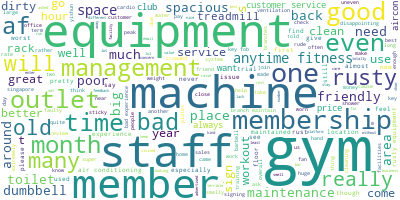

In [67]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(reviews['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [72]:
# Function to generate wordclouds for multiple outlets
def generate_outlet_wordclouds(outlet_names, subplot_cols=2, figsize=(15, 10)):
    """
    Generate wordclouds for multiple outlets in a subplot layout
    
    Parameters:
    outlet_names (list): List of outlet names to generate wordclouds for
    subplot_cols (int): Number of columns in subplot layout
    figsize (tuple): Figure size for the overall plot
    """
    import math
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    import re
    
    # Filter outlet names to only include those that exist in our data
    available_outlets = [name for name in outlet_names if name in outlet_dataframes]
    
    if not available_outlets:
        print("❌ None of the specified outlets were found in loaded data")
        print(f"💡 Available outlets: {list(outlet_dataframes.keys())}")
        return
    
    # Calculate subplot layout
    n_outlets = len(available_outlets)
    subplot_rows = math.ceil(n_outlets / subplot_cols)
    
    # Create subplot figure
    fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=figsize)
    fig.suptitle('WordClouds for Different Anytime Fitness Outlets', fontsize=16, fontweight='bold')
    
    # Handle single subplot case
    if n_outlets == 1:
        axes = [axes]
    elif subplot_rows == 1:
        axes = axes if isinstance(axes, list) else [axes]
    else:
        axes = axes.flatten()
    
    for i, outlet_name in enumerate(available_outlets):
        # Get outlet data
        outlet_data = outlet_dataframes[outlet_name].copy()
        
        # Process text data
        outlet_data['text'] = outlet_data['text'].fillna('')
        outlet_data['review_text_processed'] = outlet_data['text'].map(
            lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x))
        )
        outlet_data['review_text_processed'] = outlet_data['review_text_processed'].map(
            lambda x: x.strip().lower()
        )
        
        # Remove empty reviews
        outlet_data = outlet_data[outlet_data['review_text_processed'] != '']
        
        if len(outlet_data) == 0:
            print(f"⚠️ No valid text data for {outlet_name}")
            axes[i].text(0.5, 0.5, f'No valid text data\nfor {outlet_name}', 
                        horizontalalignment='center', verticalalignment='center',
                        transform=axes[i].transAxes, fontsize=12)
            axes[i].set_title(outlet_name, fontsize=12, fontweight='bold')
            axes[i].axis('off')
            continue
        
        # Join text for wordcloud
        text_for_wordcloud = ' '.join(outlet_data['review_text_processed'].values)
        
        # Create wordcloud
        outlet_wordcloud = WordCloud(
            background_color="white", 
            max_words=100, 
            contour_width=1, 
            contour_color='steelblue',
            width=400, 
            height=300,
            colormap='viridis'
        ).generate(text_for_wordcloud)
        
        # Plot wordcloud
        axes[i].imshow(outlet_wordcloud, interpolation='bilinear')
        axes[i].set_title(f'{outlet_name}\n({len(outlet_data)} reviews)', 
                         fontsize=10, fontweight='bold', pad=10)
        axes[i].axis('off')
    
    # Hide empty subplots
    for i in range(n_outlets, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage - generate wordclouds for all loaded outlets
print("🏢 Available outlets for wordcloud generation:")
for i, outlet in enumerate(outlet_dataframes.keys(), 1):
    print(f"{i}. {outlet}")

🏢 Available outlets for wordcloud generation:
1. Anytime Fitness City Square Mall
2. Anytime Fitness Bedok 85
3. Anytime Fitness Bukit Timah Central
4. Anytime Fitness Buona Vista
5. Anytime Fitness Havelock Outram
6. Anytime Fitness Northpoint City
7. Anytime Fitness NEX
8. Anytime Fitness hillV2
9. Anytime Fitness Upper Cross Street
10. Anytime Fitness Paya Lebar


--------------------Top 5 Outlets--------------------


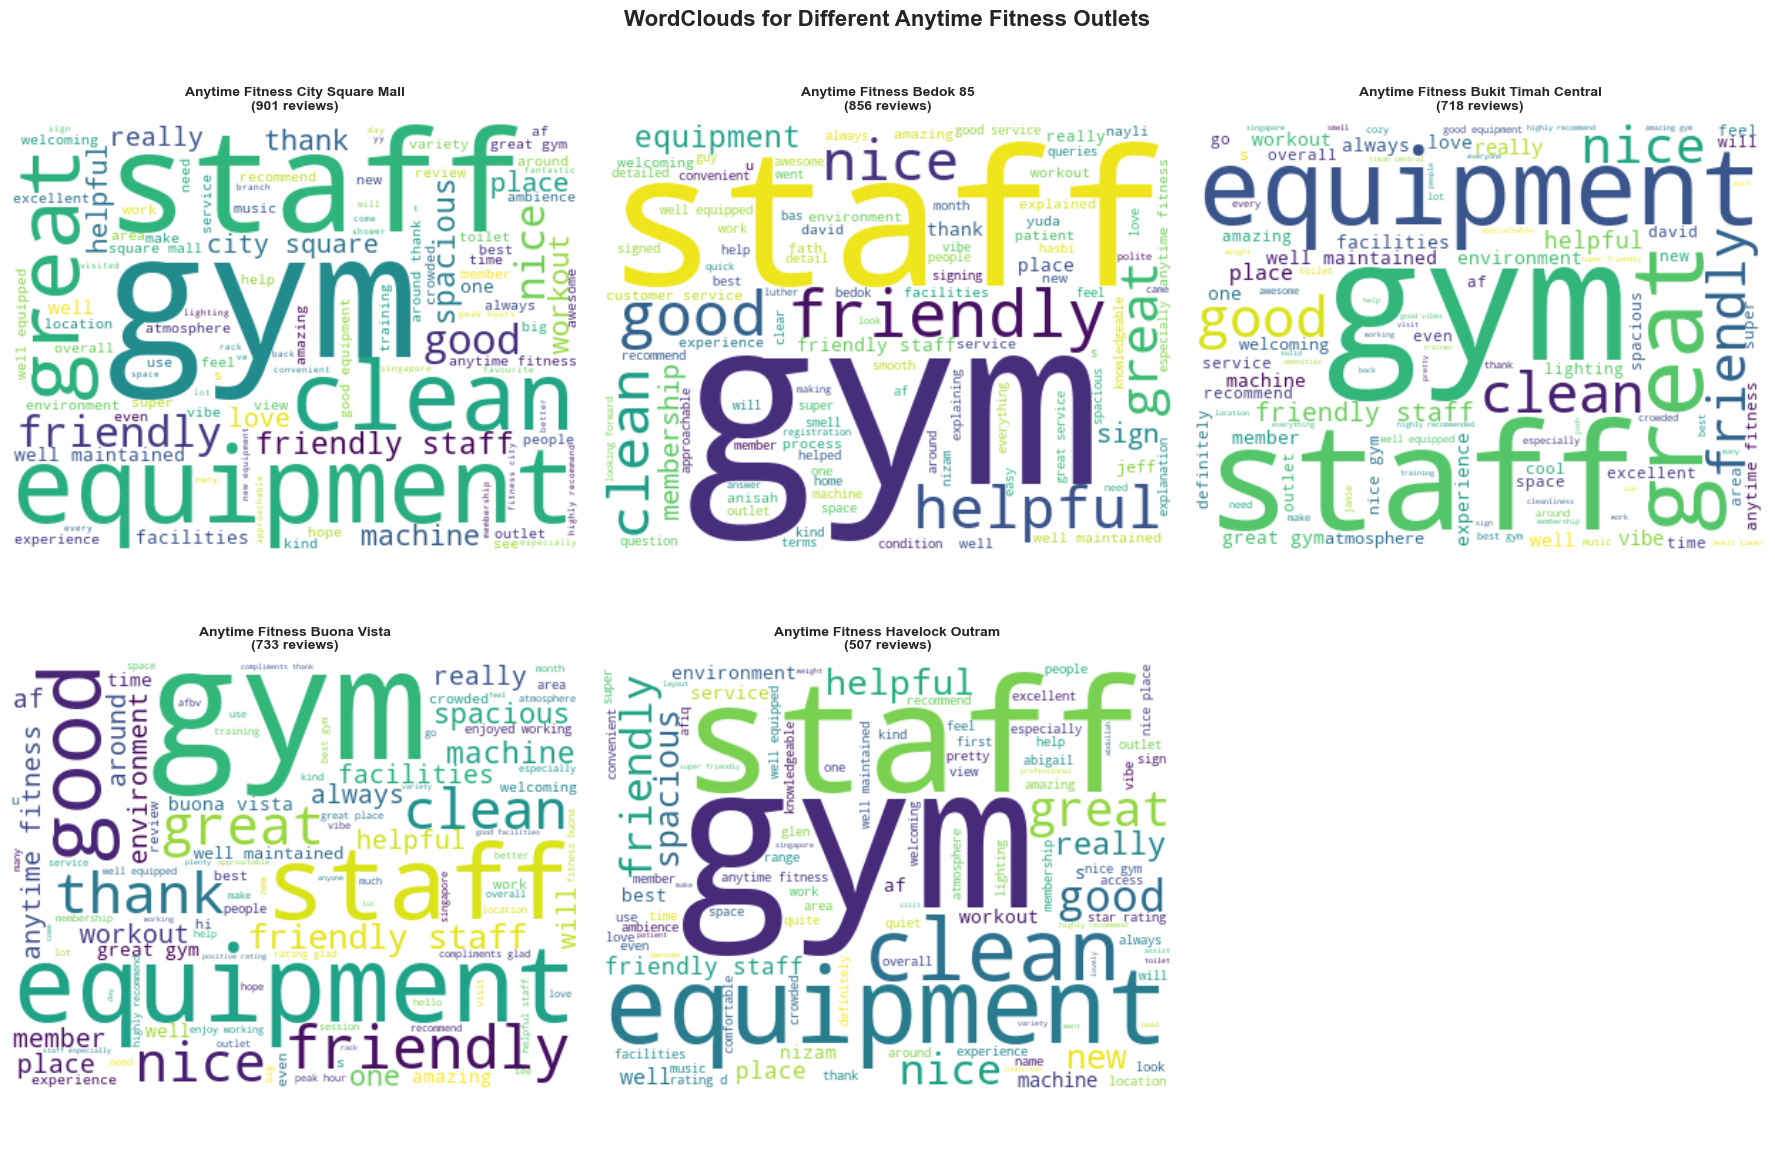

--------------------Bottom 5 Outlets--------------------


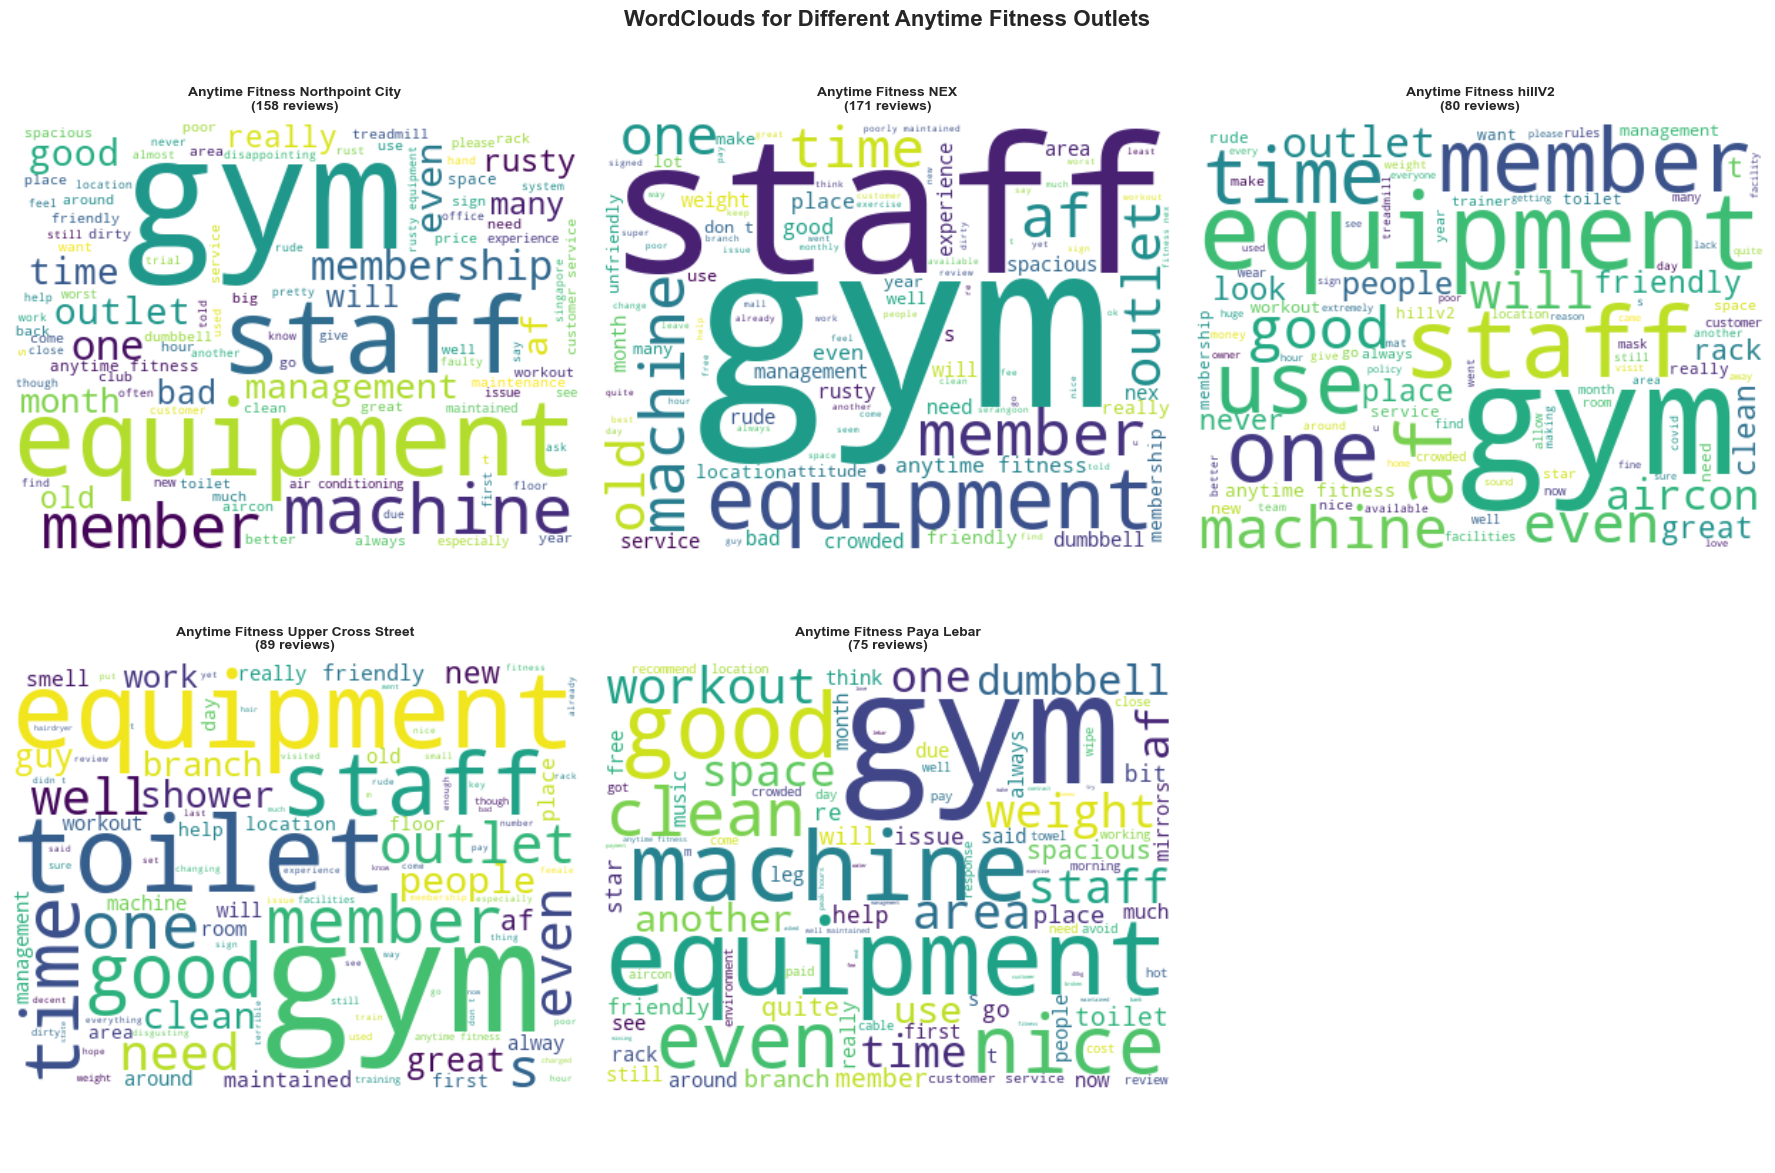


Current outlet DataFrames loaded:
  • Anytime Fitness City Square Mall: 953 reviews
  • Anytime Fitness Bedok 85: 1003 reviews
  • Anytime Fitness Bukit Timah Central: 882 reviews
  • Anytime Fitness Buona Vista: 773 reviews
  • Anytime Fitness Havelock Outram: 606 reviews
  • Anytime Fitness Northpoint City: 243 reviews
  • Anytime Fitness NEX: 295 reviews
  • Anytime Fitness hillV2: 112 reviews
  • Anytime Fitness Upper Cross Street: 142 reviews
  • Anytime Fitness Paya Lebar: 138 reviews


In [73]:
# READY-TO-RUN EXAMPLES - Uncomment the line you want to execute

# Example 1: Generate wordclouds for all loaded outlets
# generate_outlet_wordclouds(list(outlet_dataframes.keys()))

# Example 2: Generate wordclouds for specific outlets (customize this list)
top_5_outlets = [
    'Anytime Fitness City Square Mall', 
    'Anytime Fitness Bedok 85', 
    'Anytime Fitness Bukit Timah Central', 
    'Anytime Fitness Buona Vista',
    'Anytime Fitness Havelock Outram'
]

bottom_5_outlets = [ 
    'Anytime Fitness Northpoint City', 
    'Anytime Fitness NEX', 
    'Anytime Fitness hillV2', 
    'Anytime Fitness Upper Cross Street', 
    'Anytime Fitness Paya Lebar'
]

print("--------------------Top 5 Outlets--------------------")
generate_outlet_wordclouds(top_5_outlets, subplot_cols=3, figsize=(18, 12))
print("--------------------Bottom 5 Outlets--------------------")
generate_outlet_wordclouds(bottom_5_outlets, subplot_cols=3, figsize=(18, 12))

print()
print("Current outlet DataFrames loaded:")
for outlet_name, df in outlet_dataframes.items():
    print(f"  • {outlet_name}: {len(df)} reviews")

In [29]:
# Function to analyze top 15 most common words per outlet and plot in one view
def analyze_outlet_word_frequencies(outlet_names, figsize=(20, 15)):
    """
    Analyze top 15 most common words for each outlet and plot them in subplots
    
    Parameters:
    outlet_names (list): List of outlet names to analyze
    figsize (tuple): Figure size for the overall plot
    """
    import math
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.feature_extraction.text import CountVectorizer
    import re
    
    # Filter outlet names to only include those that exist in our data
    available_outlets = [name for name in outlet_names if name in outlet_dataframes]
    
    if not available_outlets:
        print("❌ None of the specified outlets were found in loaded data")
        print(f"💡 Available outlets: {list(outlet_dataframes.keys())}")
        return
    
    n_outlets = len(available_outlets)
    subplot_cols = 2
    subplot_rows = math.ceil(n_outlets / subplot_cols)
    
    # Create subplot figure
    fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=figsize)
    fig.suptitle('Top 15 Most Common Words by Outlet (After Filtering)', fontsize=18, fontweight='bold', y=0.98)
    
    # Handle single subplot case
    if n_outlets == 1:
        axes = [axes]
    elif subplot_rows == 1:
        axes = axes if isinstance(axes, list) else [axes]
    else:
        axes = axes.flatten()
    
    # Define custom stop words (same as before)
    custom_stop_words = [
        'gym', 'fitness', 'anytime', 'af', 'workout', 'exercise',
        'visit', 'go', 'come', 'use', 'work', 'train'
    ]
    
    # Combine with English stop words
    all_stop_words = list(CountVectorizer(stop_words='english').get_stop_words()) + custom_stop_words
    
    # Analyze each outlet
    for i, outlet_name in enumerate(available_outlets):
        
        # Get outlet data
        outlet_data = outlet_dataframes[outlet_name].copy()
        
        # Process text data
        outlet_data['text'] = outlet_data['text'].fillna('')
        outlet_data['review_text_processed'] = outlet_data['text'].map(
            lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x))
        )
        outlet_data['review_text_processed'] = outlet_data['review_text_processed'].map(
            lambda x: x.strip().lower()
        )
        
        # Remove empty reviews
        outlet_data = outlet_data[outlet_data['review_text_processed'] != '']
        
        
        # Create count vectorizer for this outlet
        count_vectorizer = CountVectorizer(
            stop_words=all_stop_words,
            min_df=1, 
            max_df=0.9,
            ngram_range=(1, 2)
        )
        
        try:
            count_data = count_vectorizer.fit_transform(outlet_data['review_text_processed'])
            
            # Get word frequencies
            words = count_vectorizer.get_feature_names_out()
            total_counts = np.zeros(len(words))
            for t in count_data:
                total_counts += t.toarray()[0]
            
            # Get top 15 words
            count_dict = list(zip(words, total_counts))
            count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[:15]
            
            if not count_dict:
                continue
            
            words_top = [w[0] for w in count_dict]
            counts_top = [w[1] for w in count_dict]
            x_pos = np.arange(len(words_top))
            
            # Create bar plot
            sns.barplot(x=x_pos, y=counts_top, palette='viridis', ax=axes[i])
            axes[i].set_xticks(x_pos)
            axes[i].set_xticklabels(words_top, rotation=45, ha='right', fontsize=9)
            axes[i].set_title(f'{outlet_name}\n({len(outlet_data)} reviews)', fontsize=11, fontweight='bold', pad=15)
            axes[i].set_xlabel('Words', fontsize=10)
            axes[i].set_ylabel('Frequency', fontsize=10)
            
            # Add value labels on bars
            for j, (word, count) in enumerate(zip(words_top, counts_top)):
                axes[i].text(j, count + 0.5, str(int(count)), ha='center', va='bottom', fontsize=8)
            
            
        except Exception as e:
            print(f"❌ Error analyzing {outlet_name}: {e}")
            axes[i].text(0.5, 0.5, f'Error analyzing\n{outlet_name}', 
                        horizontalalignment='center', verticalalignment='center',
                        transform=axes[i].transAxes, fontsize=12)
            axes[i].set_title(f'{outlet_name}\n(Error)', fontsize=12, fontweight='bold')
            axes[i].axis('off')
    
    # Hide empty subplots
    for i in range(n_outlets, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Make room for main title
    plt.show()


--------------------Top 5 Outlets--------------------


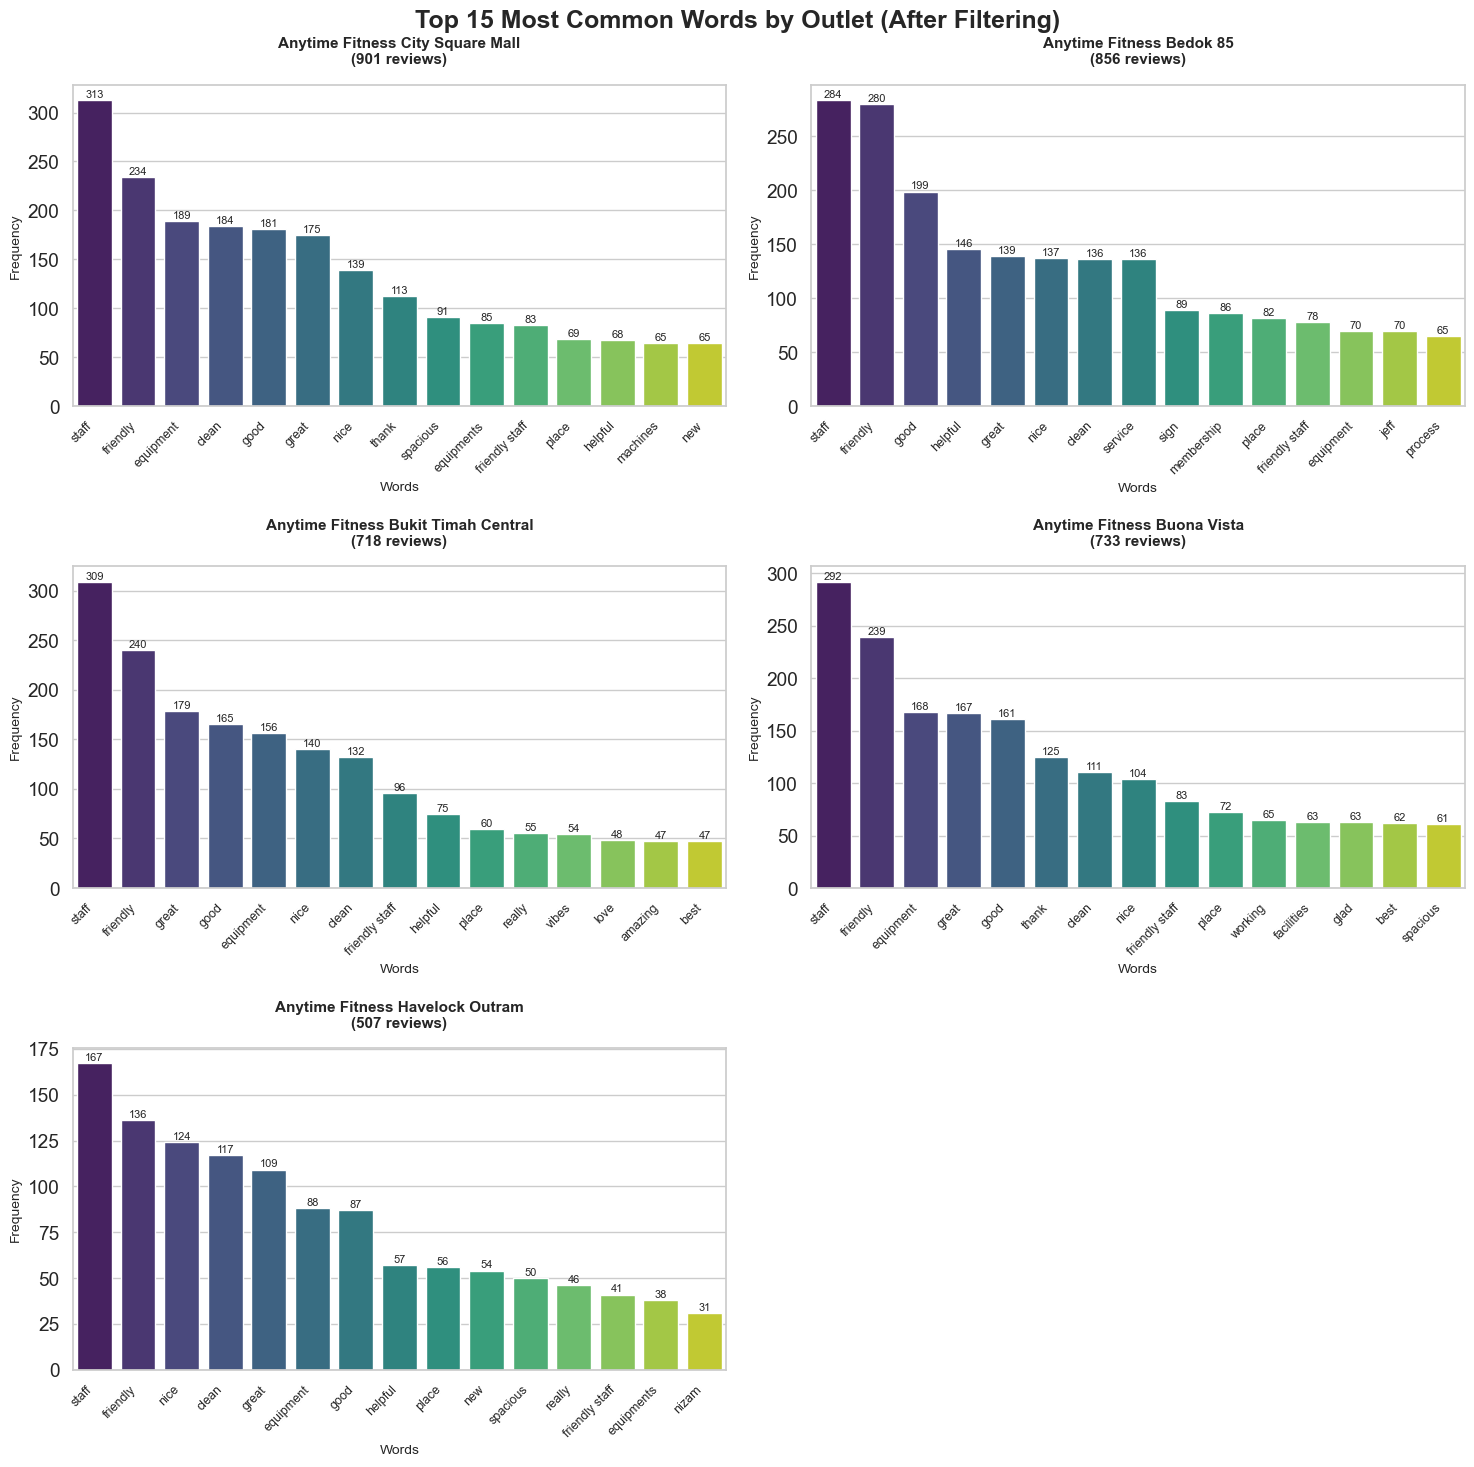

--------------------Bottom 5 Outlets--------------------


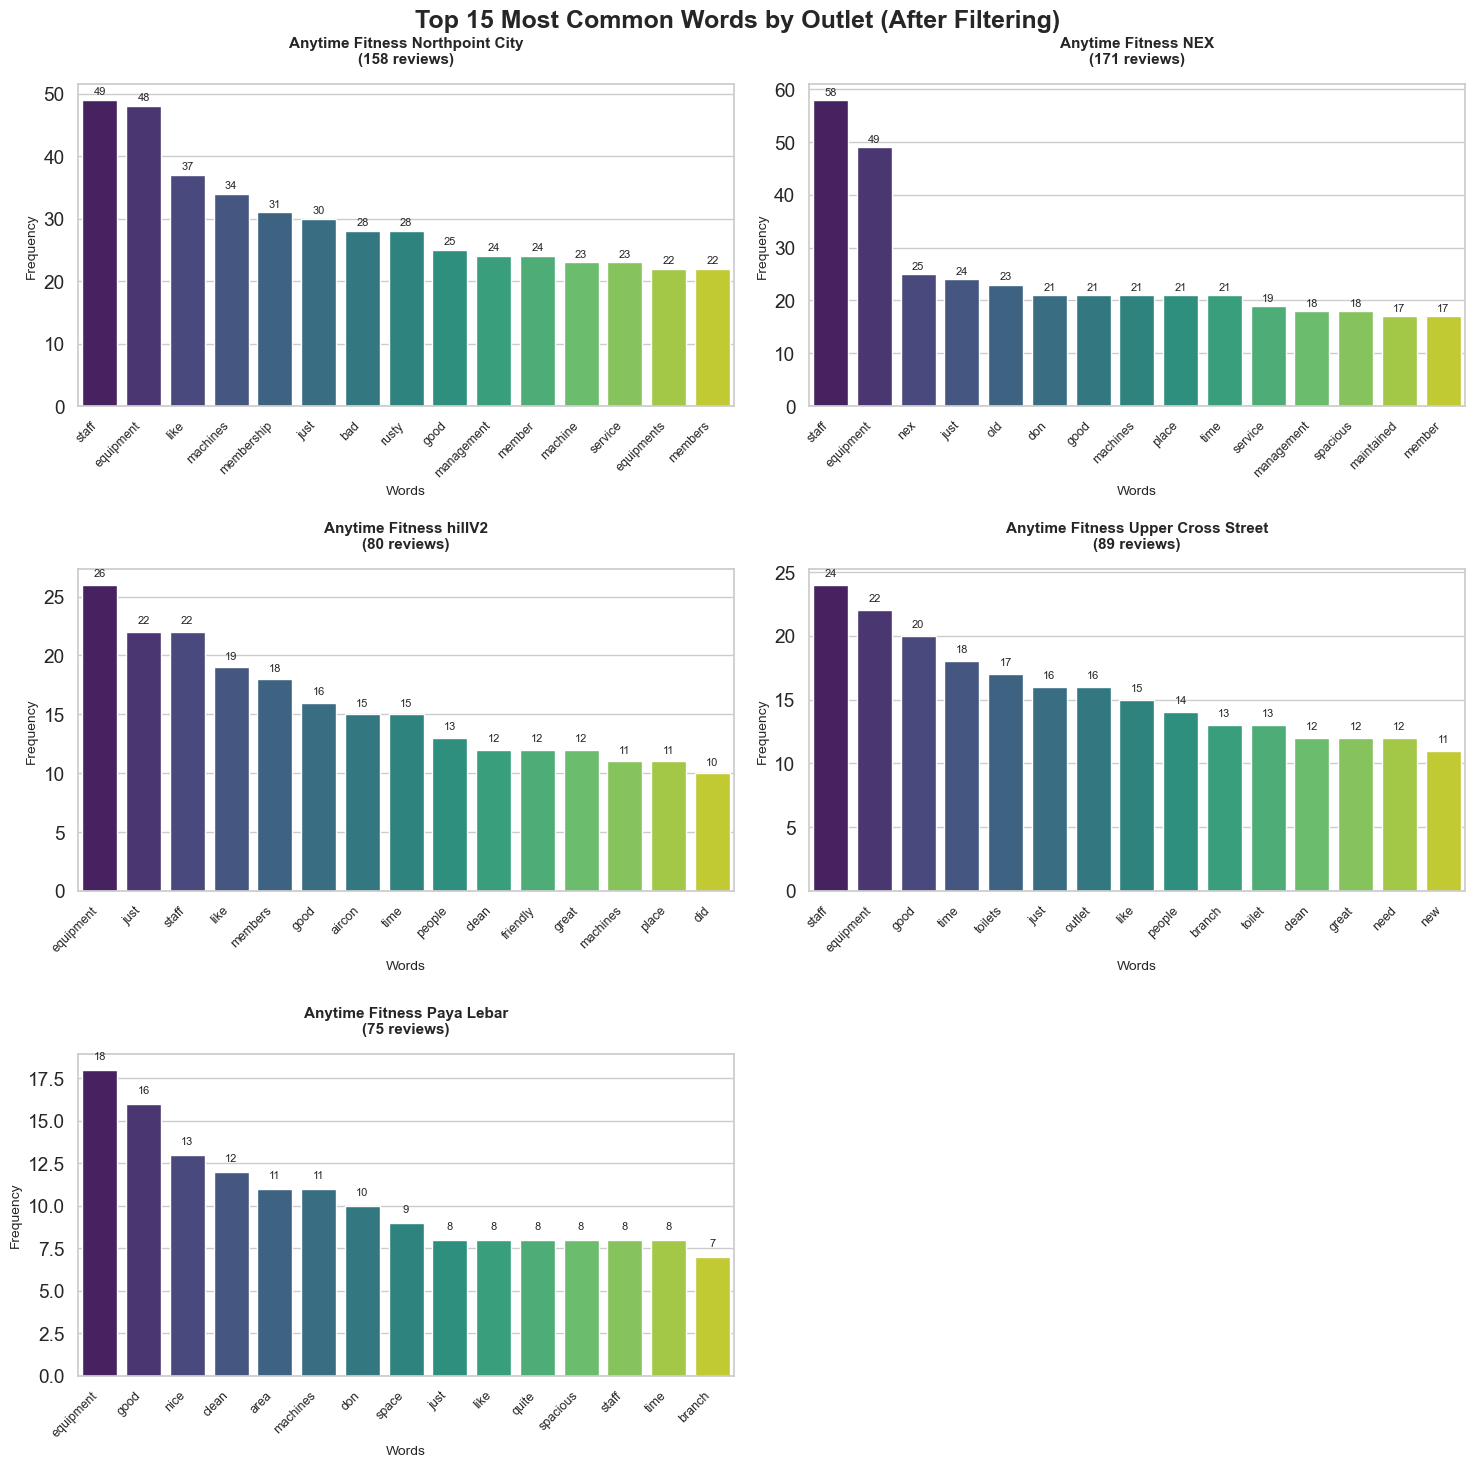

In [78]:
print("--------------------Top 5 Outlets--------------------")
analyze_outlet_word_frequencies(top_5_outlets, figsize=(15, 15))
print("--------------------Bottom 5 Outlets--------------------")
analyze_outlet_word_frequencies(bottom_5_outlets, figsize=(15, 15))

In [ ]:
# Function to run topic modeling analysis for different outlets separately
def run_topic_modeling_per_outlet(outlet_names, num_topics=5, num_words=8, save_results=False):
    """
    Run topic modeling analysis for each outlet separately
    
    Parameters:
    outlet_names (list): List of outlet names to analyze
    num_topics (int): Number of topics to extract per outlet
    num_words (int): Number of words to show per topic
    save_results (bool): Whether to save results to files
    
    Returns:
    dict: Dictionary containing results for each outlet
    """
    import re
    import pandas as pd
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation as LDA
    import warnings
    warnings.simplefilter("ignore", DeprecationWarning)
    
    # Filter outlet names to only include those that exist in our data
    available_outlets = [name for name in outlet_names if name in outlet_dataframes]
    
    # Store results for each outlet
    outlet_results = {}
    
    # Define custom stop words
    custom_stop_words = [
        'gym', 'fitness', 'anytime', 'af', 'workout', 'exercise',
        'visit', 'go', 'come', 'use', 'work', 'train'
    ]
    
    all_stop_words = list(CountVectorizer(stop_words='english').get_stop_words()) + custom_stop_words
    
    for outlet_name in available_outlets:
        # Get outlet data
        outlet_data = outlet_dataframes[outlet_name].copy()
        
        # Process text data
        outlet_data['text'] = outlet_data['text'].fillna('')
        outlet_data['review_text_processed'] = outlet_data['text'].map(
            lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x))
        )
        outlet_data['review_text_processed'] = outlet_data['review_text_processed'].map(
            lambda x: x.strip().lower()
        )
        
        # Remove empty reviews
        outlet_data = outlet_data[outlet_data['review_text_processed'] != '']
        
        
        if len(outlet_data) < 5:
            outlet_results[outlet_name] = {
                'status': 'insufficient_data',
                'review_count': len(outlet_data),
                'topics': None,
                'model': None,
                'vectorizer': None
            }
            continue
        
        try:
            # Create count vectorizer for this outlet
            count_vectorizer = CountVectorizer(
                stop_words=all_stop_words,
                min_df=2,
                max_df=0.8,
                ngram_range=(1, 2)
            )
            
            count_data = count_vectorizer.fit_transform(outlet_data['review_text_processed'])
            
            # Create and fit LDA model
            lda = LDA(n_components=num_topics, random_state=42)
            lda.fit(count_data)
            
            # Extract topics
            words = count_vectorizer.get_feature_names_out()
            topics = []
            
            print(f" Topics found for {outlet_name}:")
            for topic_idx, topic in enumerate(lda.components_):
                topic_words = [words[i] for i in topic.argsort()[:-num_words - 1:-1]]
                topics.append(topic_words)
                print(f"\nTopic #{topic_idx + 1}: {' '.join(topic_words)}")
            
            # Store results
            outlet_results[outlet_name] = {
                'status': 'success',
                'review_count': len(outlet_data),
                'topics': topics,
                'model': lda,
                'vectorizer': count_vectorizer,
                'count_data': count_data,
                'processed_data': outlet_data
            }
            
            # Calculate average rating if available
            if 'rating' in outlet_data.columns:
                avg_rating = outlet_data['rating'].mean()
                outlet_results[outlet_name]['avg_rating'] = avg_rating
                print(f"Average rating: {avg_rating:.2f}")
        
            print("--------------------------------------------------------------------------")
            
        except Exception as e:
            outlet_results[outlet_name] = {
                'status': 'error',
                'review_count': len(outlet_data),
                'error': str(e),
                'topics': None,
                'model': None,
                'vectorizer': None
            }
    return outlet_results


In [98]:

print("--------------------Top 5 Outlets--------------------")
run_topic_modeling_per_outlet(top_5_outlets, num_topics=10, num_words=10)


--------------------Top 5 Outlets--------------------

🎯 Topics found for Anytime Fitness City Square Mall:

Topic #1: thank review hope thank review star thank hope review hope feedback soon thank star

Topic #2: clean spacious machines friendly equipped good variety staff equipment city

Topic #3: nice clean spacious equipments best great new staff view variety

Topic #4: great staff friendly equipment friendly staff clean maintained facilities great equipment staff friendly

Topic #5: equipment nice welcoming support staff clean forward decent look forward spacious new

Topic #6: place city city square square love mall square mall equipment awesome staff

Topic #7: friendly staff good helpful friendly helpful amazing environment nice recommended staff friendly

Topic #8: staff friendly recommend highly recommend experience highly super square city square city

Topic #9: staff 10 friendly really service 10 10 experience helpful love star review

Topic #10: good equipment clean good e

{'Anytime Fitness City Square Mall': {'status': 'success',
  'review_count': 901,
  'topics': [['thank',
    'review',
    'hope',
    'thank review',
    'star',
    'thank hope',
    'review hope',
    'feedback',
    'soon',
    'thank star'],
   ['clean',
    'spacious',
    'machines',
    'friendly',
    'equipped',
    'good',
    'variety',
    'staff',
    'equipment',
    'city'],
   ['nice',
    'clean',
    'spacious',
    'equipments',
    'best',
    'great',
    'new',
    'staff',
    'view',
    'variety'],
   ['great',
    'staff',
    'friendly',
    'equipment',
    'friendly staff',
    'clean',
    'maintained',
    'facilities',
    'great equipment',
    'staff friendly'],
   ['equipment',
    'nice',
    'welcoming',
    'support',
    'staff',
    'clean',
    'forward',
    'decent',
    'look forward',
    'spacious new'],
   ['place',
    'city',
    'city square',
    'square',
    'love',
    'mall',
    'square mall',
    'equipment',
    'awesome',
    

In [99]:
print("--------------------Bottom 5 Outlets--------------------")
run_topic_modeling_per_outlet(top_5_outlets, num_topics=10, num_words=10)

--------------------Bottom 5 Outlets--------------------

🎯 Topics found for Anytime Fitness City Square Mall:

Topic #1: thank review hope thank review star thank hope review hope feedback soon thank star

Topic #2: clean spacious machines friendly equipped good variety staff equipment city

Topic #3: nice clean spacious equipments best great new staff view variety

Topic #4: great staff friendly equipment friendly staff clean maintained facilities great equipment staff friendly

Topic #5: equipment nice welcoming support staff clean forward decent look forward spacious new

Topic #6: place city city square square love mall square mall equipment awesome staff

Topic #7: friendly staff good helpful friendly helpful amazing environment nice recommended staff friendly

Topic #8: staff friendly recommend highly recommend experience highly super square city square city

Topic #9: staff 10 friendly really service 10 10 experience helpful love star review

Topic #10: good equipment clean goo

{'Anytime Fitness City Square Mall': {'status': 'success',
  'review_count': 901,
  'topics': [['thank',
    'review',
    'hope',
    'thank review',
    'star',
    'thank hope',
    'review hope',
    'feedback',
    'soon',
    'thank star'],
   ['clean',
    'spacious',
    'machines',
    'friendly',
    'equipped',
    'good',
    'variety',
    'staff',
    'equipment',
    'city'],
   ['nice',
    'clean',
    'spacious',
    'equipments',
    'best',
    'great',
    'new',
    'staff',
    'view',
    'variety'],
   ['great',
    'staff',
    'friendly',
    'equipment',
    'friendly staff',
    'clean',
    'maintained',
    'facilities',
    'great equipment',
    'staff friendly'],
   ['equipment',
    'nice',
    'welcoming',
    'support',
    'staff',
    'clean',
    'forward',
    'decent',
    'look forward',
    'spacious new'],
   ['place',
    'city',
    'city square',
    'square',
    'love',
    'mall',
    'square mall',
    'equipment',
    'awesome',
    

In [43]:
!pip install pyLDAvis==3.4.1

In [ ]:
# Function to create LDA models and visualizations for selected outlets
def create_lda_models_for_outlets(outlet_names, num_topics=5, save_html=True, show_visualization=True):
    """
    Create LDA models and interactive pyLDAvis visualizations for selected outlets
    
    Parameters:
    outlet_names (list): List of outlet names to create LDA models for
    num_topics (int): Number of topics to extract per outlet
    save_html (bool): Whether to save visualizations as HTML files
    show_visualization (bool): Whether to display visualizations in notebook
    
    Returns:
    dict: Dictionary containing LDA models, visualizations, and metadata for each outlet
    """
    import re
    import os
    import pickle
    import warnings
    import pyLDAvis
    import pyLDAvis.lda_model
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation as LDA
    
    warnings.simplefilter("ignore", DeprecationWarning)
    
    # Filter outlet names to only include those that exist in our data
    available_outlets = [name for name in outlet_names if name in outlet_dataframes]
    
    # Store results for each outlet
    lda_models = {}
    
    # Define custom stop words
    custom_stop_words = [
        'gym', 'fitness', 'anytime', 'af', 'workout', 'exercise',
        'visit', 'go', 'come', 'use', 'work', 'train'
    ]
    
    all_stop_words = list(CountVectorizer(stop_words='english').get_stop_words()) + custom_stop_words
    
    print("🔬 CREATING LDA MODELS AND VISUALIZATIONS")
    print("="*80)
    
    for outlet_name in available_outlets:
        # Get outlet data
        outlet_data = outlet_dataframes[outlet_name].copy()
        
        # Process text data
        outlet_data['text'] = outlet_data['text'].fillna('')
        outlet_data['review_text_processed'] = outlet_data['text'].map(
            lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x))
        )
        outlet_data['review_text_processed'] = outlet_data['review_text_processed'].map(
            lambda x: x.strip().lower()
        )
        
        # Remove empty reviews
        outlet_data = outlet_data[outlet_data['review_text_processed'] != '']
        
        try:
            count_vectorizer = CountVectorizer(
                stop_words=all_stop_words,
                min_df=2,
                max_df=0.8,
                ngram_range=(1, 2)
            )
            
            count_data = count_vectorizer.fit_transform(outlet_data['review_text_processed'])

            # Create and fit LDA model
            lda_model = LDA(n_components=num_topics, random_state=42, max_iter=100)
            lda_model.fit(count_data)
            
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=DeprecationWarning)
                ldavis_prepared = pyLDAvis.lda_model.prepare(lda_model, count_data, count_vectorizer)
            
            # Save visualization as HTML if requested
            if save_html:
                safe_outlet_name = outlet_name.replace(' ', '_').replace('/', '_')
                html_filename = f'lda_viz_{safe_outlet_name}.html'
                pyLDAvis.save_html(ldavis_prepared, html_filename)
                print(f"💾 Visualization saved as: {html_filename}")
            
            # Extract topics for display
            words = count_vectorizer.get_feature_names_out()
            topics = []
            
            # Store results
            lda_models[outlet_name] = {
                'status': 'success',
                'review_count': len(outlet_data),
                'model': lda_model,
                'vectorizer': count_vectorizer,
                'count_data': count_data,
                'visualization': ldavis_prepared,
                'topics': topics,
                'processed_data': outlet_data
            }
            
            # Display visualization in notebook if requested
            if show_visualization:
                print(f"\n📈 Interactive visualization for {outlet_name}:")
                pyLDAvis.enable_notebook()
                display(ldavis_prepared)
            
        except Exception as e:
            lda_models[outlet_name] = {
                'status': 'error',
                'review_count': len(outlet_data),
                'error': str(e),
                'model': None,
                'visualization': None
            }
    return lda_models

In [107]:
lda_models = create_lda_models_for_outlets(top_5_outlets, num_topics=10, save_html=True, show_visualization=True)

🔬 CREATING LDA MODELS AND VISUALIZATIONS
💾 Visualization saved as: lda_viz_Anytime_Fitness_City_Square_Mall.html

📈 Interactive visualization for Anytime Fitness City Square Mall:
💾 Visualization saved as: lda_viz_Anytime_Fitness_City_Square_Mall.html

📈 Interactive visualization for Anytime Fitness City Square Mall:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.139894 -0.080845       1        1  16.160291
7     -0.007211  0.146826       2        1  13.000949
1      0.015244  0.096525       3        1  10.491864
6      0.060301 -0.050182       4        1  10.481236
5      0.012721  0.133786       5        1  10.388775
2      0.084682 -0.062557       6        1   9.694367
8     -0.007799  0.033182       7        1   9.563156
9      0.087900 -0.153866       8        1   8.974760
0     -0.331275 -0.100712       9        1   7.083957
4     -0.054457  0.037843      10        1   4.160645, topic_info=           Term        Freq       Total Category  logprob  loglift
480        good  155.000000  155.000000  Default  30.0000  30.0000
1169      thank   93.000000   93.000000  Default  29.0000  29.0000
506       great  154.000000  154.000000  Default  28.0000  28.0000
781        nice  120.000000  120.000000  Default  27.0000  27.0000
974      review   42.000000   42.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
771         new    2.986615   57.358501  Topic10  -4.8353   0.2243
1049       soon    2.221285   13.308677  Topic10  -5.1314   1.3892
956   recommend    2.616505   47.285167  Topic10  -4.9676   0.2851
162        city    2.597410   54.306616  Topic10  -4.9750   0.1394
167       clean    2.806389  161.472938  Topic10  -4.8976  -0.8729

[618 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         6  0.034274               10
0         7  0.925394               10
1         7  0.904423            10 10
2         7  0.907063     10 recommend
4         4  0.767434  100 recommended
...     ...       ...              ...
1320      6  0.139655           yuyang
1321      3  0.152957               yy
1321      5  0.458870               yy
1321      6  0.229435               yy
1321     10  0.076478               yy

[1057 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 2, 7, 6, 3, 9, 10, 1, 5])

💾 Visualization saved as: lda_viz_Anytime_Fitness_Bedok_85.html

📈 Interactive visualization for Anytime Fitness Bedok 85:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.088968  0.146606       1        1  16.574545
1      0.083449  0.037830       2        1  11.520705
6      0.113338 -0.204690       3        1  11.127389
0     -0.160123 -0.006577       4        1  10.761211
8     -0.222391  0.015592       5        1  10.183787
2     -0.011051 -0.117125       6        1  10.105511
9      0.070527  0.127785       7        1   9.917016
3      0.042451  0.022347       8        1   7.929042
7     -0.016735  0.056188       9        1   6.456389
5      0.011567 -0.077956      10        1   5.424406, topic_info=            Term        Freq       Total Category  logprob  loglift
462         good  172.000000  172.000000  Default  30.0000  30.0000
955      service  119.000000  119.000000  Default  29.0000  29.0000
767         nice  119.000000  119.000000  Default  28.0000  28.0000
0             10   33.000000   33.000000  Default  27.0000  27.0000
984         sign   78.000000   78.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
665      looking    3.301747   21.680457  Topic10  -4.9324   1.0323
119         best    3.141594   22.479691  Topic10  -4.9821   0.9464
345   explaining    2.976674   24.330092  Topic10  -5.0360   0.8134
1083       super    2.945457   31.284606  Topic10  -5.0466   0.5514
672         love    2.826370   23.528197  Topic10  -5.0878   0.7951

[642 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0        10  0.970738            10
1        10  0.963647         10 10
2         1  0.813530  10 recommend
2         5  0.162706  10 recommend
13        1  0.030661            85
...     ...       ...           ...
1230      6  0.142621  yuda helpful
1231      4  0.906014         yulun
1232      6  0.178517          yuni
1232      7  0.089258          yuni
1232      9  0.714068          yuni

[1105 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 7, 1, 9, 3, 10, 4, 8, 6])

💾 Visualization saved as: lda_viz_Anytime_Fitness_Bukit_Timah_Central.html

📈 Interactive visualization for Anytime Fitness Bukit Timah Central:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.218142 -0.012543       1        1  18.430234
0      0.023490 -0.037197       2        1  15.444499
8     -0.002322  0.034633       3        1  12.662166
1      0.038398  0.236001       4        1  10.468174
6     -0.136042  0.014375       5        1   8.995810
5      0.091757 -0.030325       6        1   7.908460
4     -0.007793 -0.076278       7        1   7.553375
3      0.162594 -0.006776       8        1   6.684381
7      0.043222 -0.130489       9        1   6.155190
9      0.004839  0.008600      10        1   5.697710, topic_info=                Term        Freq       Total Category  logprob  loglift
467            great  153.000000  153.000000  Default  30.0000  30.0000
437             good  140.000000  140.000000  Default  29.0000  29.0000
722             nice  119.000000  119.000000  Default  28.0000  28.0000
394         friendly  209.000000  209.000000  Default  27.0000  27.0000
408   friendly staff   85.000000   85.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
1021           super    2.892685   38.913460  Topic10  -4.9518   0.2660
1130       welcoming    2.729656   30.097154  Topic10  -5.0098   0.4649
637             love    2.804053   42.179627  Topic10  -4.9829   0.1542
960            staff    2.631484  270.359573  Topic10  -5.0464  -1.7671
323       especially    2.542748   18.037244  Topic10  -5.0807   0.9059

[597 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         5  0.204434       10
0         6  0.204434       10
0         9  0.545159       10
1         5  0.210230    10 10
1         6  0.210230    10 10
...     ...       ...      ...
1148      5  0.089197  working
1148      6  0.267591  working
1148      9  0.267591  working
1152      3  0.194136    years
1152      8  0.582407    years

[1009 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 9, 2, 7, 6, 5, 4, 8, 10])

💾 Visualization saved as: lda_viz_Anytime_Fitness_Buona_Vista.html

📈 Interactive visualization for Anytime Fitness Buona Vista:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.139412 -0.125905       1        1  14.531805
1      0.123901 -0.039832       2        1  14.156009
6      0.053140  0.128098       3        1  12.812171
2     -0.180181 -0.240437       4        1   9.806432
4      0.104395  0.022799       5        1   9.596378
5      0.014171  0.050041       6        1   9.465424
0     -0.255686  0.060001       7        1   8.265540
9      0.070886 -0.020287       8        1   7.645797
8     -0.175717  0.111741       9        1   7.400740
7      0.105681  0.053781      10        1   6.319704, topic_info=                Term        Freq       Total Category  logprob  loglift
1074           thank  107.000000  107.000000  Default  30.0000  30.0000
396         friendly  209.000000  209.000000  Default  29.0000  29.0000
463            great  147.000000  147.000000  Default  28.0000  28.0000
999            staff  256.000000  256.000000  Default  27.0000  27.0000
436             good  139.000000  139.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
409   friendly staff    6.292653   73.349169  Topic10  -4.4114   0.3056
40           amazing    4.696887   35.182174  Topic10  -4.7039   0.7479
463            great    5.673026  147.094324  Topic10  -4.5150  -0.4939
28              afbv    4.250396   24.265569  Topic10  -4.8037   1.0195
875            range    3.488195   19.359428  Topic10  -5.0014   1.0477

[583 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         5  0.906376            10
0         6  0.067139            10
1         5  0.914075         10 10
2         5  0.762310  10 recommend
5         2  0.223453            24
...     ...       ...           ...
1185      6  0.905198          wish
1188      3  0.035385       working
1188      4  0.477692       working
1188      7  0.406923       working
1188      8  0.053077       working

[951 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 3, 5, 6, 1, 10, 9, 8])

💾 Visualization saved as: lda_viz_Anytime_Fitness_Havelock_Outram.html

📈 Interactive visualization for Anytime Fitness Havelock Outram:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.089351 -0.028388       1        1  17.114911
5      0.077396  0.157153       2        1  11.626219
6     -0.022983 -0.059429       3        1  11.260435
8      0.050514  0.094970       4        1  10.462282
7      0.041826 -0.126594       5        1  10.404470
1      0.050144 -0.052193       6        1   9.958303
4     -0.004023  0.140098       7        1   9.921351
9      0.046536 -0.060233       8        1   8.521429
3     -0.021705 -0.086165       9        1   5.662707
0     -0.307055  0.020782      10        1   5.067893, topic_info=         Term        Freq       Total Category  logprob  loglift
496     place   48.000000   48.000000  Default  30.0000  30.0000
448      nice  106.000000  106.000000  Default  29.0000  29.0000
654     thank   19.000000   19.000000  Default  28.0000  28.0000
283     great   94.000000   94.000000  Default  27.0000  27.0000
632      star   17.000000   17.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
429     music    1.593535   11.913037  Topic10  -4.9348   0.9706
319   helpful    2.262428   50.410681  Topic10  -4.5843  -0.1215
248      fuss    1.003850    4.244281  Topic10  -5.3969   1.5405
264      good    1.274249   74.916337  Topic10  -5.1584  -1.0918
186  equipped    1.140294   21.440336  Topic10  -5.2694   0.0483

[559 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         2  0.627531             10
0         3  0.179295             10
0         6  0.179295             10
1         2  0.499832          10 10
1         3  0.166611          10 10
...     ...       ...            ...
719       6  0.769023  xinyi helpful
720       3  0.757976           year
721       4  0.193306             yi
721       5  0.579918             yi
722       5  0.776842    yi friendly

[933 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 7, 9, 8, 2, 5, 10, 4, 1])

In [108]:
lda_models = create_lda_models_for_outlets(bottom_5_outlets, num_topics=5, save_html=True, show_visualization=True)

🔬 CREATING LDA MODELS AND VISUALIZATIONS
💾 Visualization saved as: lda_viz_Anytime_Fitness_Northpoint_City.html

📈 Interactive visualization for Anytime Fitness Northpoint City:
💾 Visualization saved as: lda_viz_Anytime_Fitness_Northpoint_City.html

📈 Interactive visualization for Anytime Fitness Northpoint City:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.030041 -0.053427       1        1  22.251836
1     -0.100309 -0.076129       2        1  21.226186
4      0.036321  0.108865       3        1  19.899178
0      0.110897 -0.044682       4        1  19.598107
2     -0.076950  0.065373       5        1  17.024692, topic_info=         Term       Freq      Total Category  logprob  loglift
459     rusty  23.000000  23.000000  Default  30.0000  30.0000
330    member  20.000000  20.000000  Default  29.0000  29.0000
549     trial   7.000000   7.000000  Default  28.0000  28.0000
496  spacious  13.000000  13.000000  Default  27.0000  27.0000
228      good  21.000000  21.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
475   service   3.316723  19.616596   Topic5  -4.9491  -0.0069
495     space   3.234783  18.902999   Topic5  -4.9742   0.0051
293      like   3.434511  31.204143   Topic5  -4.9142  -0.4362
333   members   2.771327  18.776363   Topic5  -5.1288  -0.1428
18        air   2.564629  11.493203   Topic5  -5.2063   0.2706

[320 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3         3  0.817840           2018
6         2  0.908478           able
12        1  0.804902     additional
15        2  0.806742     advertised
18        1  0.435040            air
...     ...       ...            ...
597       2  0.808338        working
601       3  0.123167          worst
601       4  0.615833          worst
601       5  0.246333          worst
602       4  0.816836  worst visited

[471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 1, 3])

💾 Visualization saved as: lda_viz_Anytime_Fitness_NEX.html

📈 Interactive visualization for Anytime Fitness NEX:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.066836 -0.029982       1        1  23.224981
4      0.094602 -0.052163       2        1  22.505799
0     -0.130510 -0.085212       3        1  21.992181
2      0.004877  0.044490       4        1  20.075756
1     -0.035806  0.122868       5        1  12.201284, topic_info=           Term       Freq      Total Category  logprob  loglift
472  unfriendly   9.000000   9.000000  Default  30.0000  30.0000
314         old  19.000000  19.000000  Default  29.0000  29.0000
343       place  17.000000  17.000000  Default  28.0000  28.0000
262    machines  17.000000  17.000000  Default  27.0000  27.0000
307        nice   7.000000   7.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
116         don   1.940181  17.925727   Topic5  -4.9585  -0.1198
121   dumbbells   1.758697   9.645622   Topic5  -5.0567   0.4017
321      outlet   1.730454  13.855225   Topic5  -5.0729   0.0234
135   equipment   1.779435  40.980977   Topic5  -5.0450  -1.0332
413        sign   1.611105   6.386441   Topic5  -5.1443   0.7264

[330 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         1  0.815216        100
3         1  0.815215         18
9         1  0.815216        abt
13        1  0.241916     active
13        3  0.725749     active
...     ...       ...        ...
519       2  0.405087      years
520       1  0.815216  years ago
522       4  0.262335       zero
522       5  0.524670       zero
523       5  0.881780    zero cs

[501 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 3, 2])

💾 Visualization saved as: lda_viz_Anytime_Fitness_hillV2.html

📈 Interactive visualization for Anytime Fitness hillV2:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.066245  0.020296       1        1  30.933446
2     -0.155118 -0.008149       2        1  27.396990
1      0.050936 -0.135871       3        1  19.322293
4      0.063351  0.084002       4        1  14.292162
0     -0.025413  0.039721       5        1   8.055110, topic_info=           Term       Freq      Total Category  logprob  loglift
166        just  18.000000  18.000000  Default  30.0000  30.0000
137        good  13.000000  13.000000  Default  29.0000  29.0000
17       aircon  12.000000  12.000000  Default  28.0000  28.0000
260       racks   7.000000   7.000000  Default  27.0000  27.0000
140       great   9.000000   9.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
301       staff   1.360909  18.257221   Topic5  -4.4129  -0.0775
102     evening   0.743789   3.013849   Topic5  -5.0171   1.1196
207  membership   0.742781   8.024849   Topic5  -5.0184   0.1390
310      switch   0.741979   2.953450   Topic5  -5.0195   1.1375
304        star   0.741706   4.636775   Topic5  -5.0199   0.6860

[285 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.350966        10
0         5  0.350966        10
1         5  0.500477  10 admin
6         2  0.818478       8pm
9         1  0.742918    access
...     ...       ...       ...
365       1  0.811229     worth
367       1  0.241821      year
367       2  0.725464      year
368       1  0.731866     years
368       3  0.243955     years

[430 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

💾 Visualization saved as: lda_viz_Anytime_Fitness_Upper_Cross_Street.html

📈 Interactive visualization for Anytime Fitness Upper Cross Street:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.123057  0.089628       1        1  26.641018
1     -0.008186 -0.065451       2        1  23.242520
0      0.001684 -0.006580       3        1  20.997767
2     -0.135310  0.072853       4        1  16.007348
3      0.018755 -0.090450       5        1  13.111347, topic_info=         Term       Freq      Total Category  logprob  loglift
110  friendly   8.000000   8.000000  Default  30.0000  30.0000
218     place   8.000000   8.000000  Default  29.0000  29.0000
183   members   9.000000   9.000000  Default  28.0000  28.0000
299   toilets  14.000000  14.000000  Default  27.0000  27.0000
204       old   8.000000   8.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
28     branch   2.302436  11.158448   Topic5  -4.2756   0.4535
294      time   2.300707  14.899815   Topic5  -4.2763   0.1636
195       new   1.941485   9.437585   Topic5  -4.4461   0.4504
216    people   1.782934  12.018489   Topic5  -4.5313   0.1235
115      good   1.587540  16.975758   Topic5  -4.6474  -0.3379

[265 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         1  0.320824       24
2         4  0.641649       24
4         1  0.918809       ac
5         2  0.641421   access
5         5  0.320711   access
...     ...       ...      ...
329       5  0.900631      wet
330       3  0.838618  working
332       2  0.833760    world
333       1  0.918809    worst
334       3  0.838393  written

[413 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])

💾 Visualization saved as: lda_viz_Anytime_Fitness_Paya_Lebar.html

📈 Interactive visualization for Anytime Fitness Paya Lebar:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.149549 -0.010205       1        1  26.689474
3      0.007095 -0.134593       2        1  25.369458
2      0.027491  0.130138       3        1  22.307278
4     -0.084158  0.023325       4        1  17.414895
0     -0.099977 -0.008665       5        1   8.218896, topic_info=         Term      Freq     Total Category  logprob  loglift
127     phone  2.000000  2.000000  Default  30.0000  30.0000
161   service  5.000000  5.000000  Default  29.0000  29.0000
35   customer  6.000000  6.000000  Default  28.0000  28.0000
77      hours  4.000000  4.000000  Default  27.0000  27.0000
88       like  7.000000  7.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
176      time  0.737317  6.866067   Topic5  -4.3251   0.2674
17        bit  0.736958  5.314753   Topic5  -4.3256   0.5230
130     place  0.736698  6.188668   Topic5  -4.3260   0.3704
125    people  0.736289  4.506325   Topic5  -4.3265   0.6871
35   customer  0.736222  6.013195   Topic5  -4.3266   0.3986

[234 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         2  0.840130            10
1         2  0.632426            24
1         3  0.316213            24
2         1  0.937378          40kg
3         1  0.838122           afs
...     ...       ...           ...
191       4  0.338394       weights
191       5  0.338394       weights
192       4  0.467046  weights area
192       5  0.467046  weights area
193       2  0.749546       working

[307 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])